In [3]:
import tensorflow as tf
from tensorflow import keras

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [4]:
print(tf.__version__)

1.10.0


In [6]:
fashion_mnist = keras.datasets.fashion_mnist

In [9]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 7s 1us/step


In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
def show_image(image_data):
    plt.figure()
    plt.imshow(image_data)
    plt.colorbar()
    plt.grid(False)

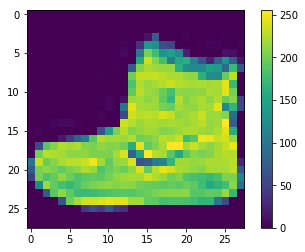

In [18]:
show_image(train_images[0])

In [19]:
# convert datatype to float
train_images = train_images / 255.0
test_images = test_images / 255.0

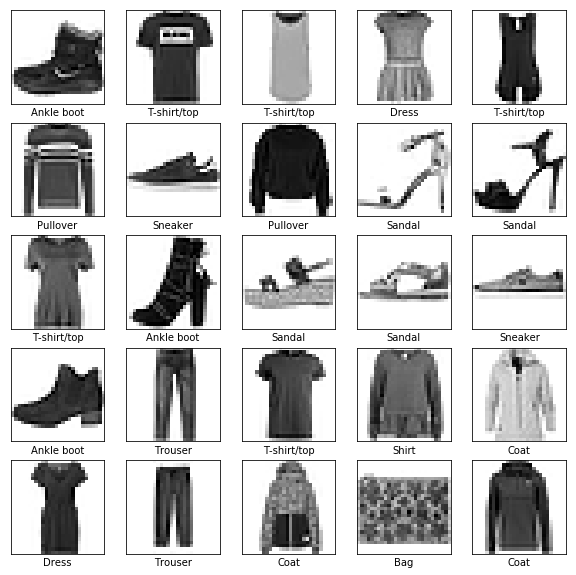

In [22]:
# display first 25 images
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([]) # 隐藏x轴坐标数值
    plt.yticks([]) # 隐藏y轴坐标数值
    plt.grid(False) # 隐藏分割线
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [23]:
# Build the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [24]:
# Compile the model
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [25]:
# Train the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.4983 - acc: 0.8257
Epoch 2/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.3768 - acc: 0.8650
Epoch 3/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.3369 - acc: 0.8779
Epoch 4/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.3121 - acc: 0.8860
Epoch 5/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.2933 - acc: 0.8928


In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 36us/step
Test accuracy: 0.8816


In [27]:
# Make predictions
predictions = model.predict(test_images)

In [29]:
np.argmax(predictions[0])

9

In [30]:
# check answer
test_labels[0]

9

In [31]:
# 显示图片，预测值，以及准确率
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777") #显示所有10个预测值
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red') # 设置预测值为红色
  thisplot[true_label].set_color('blue') # 设置正确值为蓝色，如果一样的话，会覆盖掉红色值

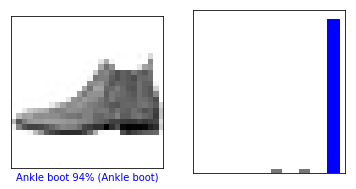

In [34]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

Fail index: 23


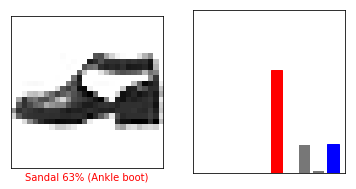

In [44]:
false_index = 0
for i in range(len(predictions)):
    if np.argmax(predictions[i]) != test_labels[i]:
        print("Fail index:", i)
        false_index = i
        break
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(false_index, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(false_index, predictions, test_labels)

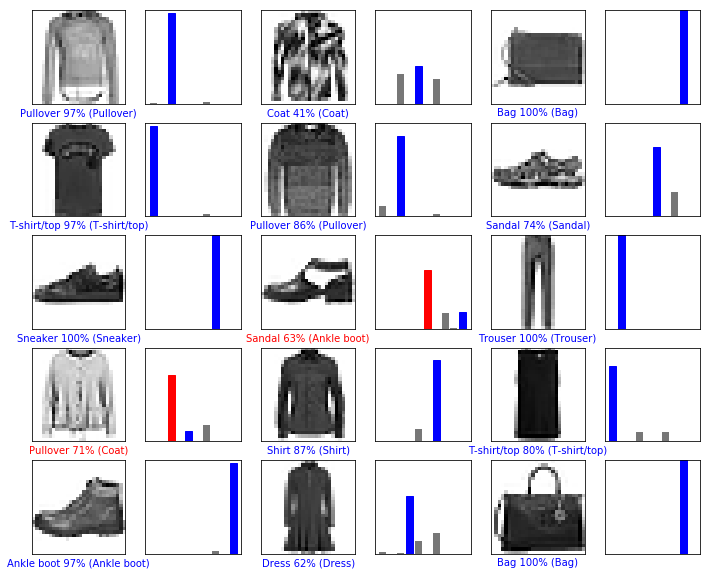

In [53]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    show_index = i + np.max(false_index - int(num_images / 2), 0) # 这里为了能够展示失败的例子，特定调整了一下index
    plt.subplot(num_rows, 2 * num_cols, i * 2 + 1)
    plot_image(show_index, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, i * 2 + 2)
    plot_value_array(show_index, predictions, test_labels)

In [58]:
# predict single image
img = test_images[0]
img = np.expand_dims(img, 0) # 添加一个维度
predictions_single = model.predict(img)
print('single prediction:', np.argmax(predictions_single))
print('true predictions:', test_labels[0])

single prediction: 9
true predictions: 9
